In [2]:
from reskit import TEST_DATA
from reskit.core.wind.turbine_library import Turbine_Library

import numpy as np
import pandas as pd
import geokit as gk


In [15]:
loc1 = gk.Location(lat=50.370680, lon=5.752684)  # grid value: 24 -> code: 312 -> rough: 0.75
loc2 = gk.Location(lat=50.52603, lon=6.10476)  # grid value: 36 -> code: 412 -> rough: 0.0005
loc3 = gk.Location(lat=50.59082, lon=5.86483)  # grid value: 1 -> code: 111 -> rough: 1.2

r = roughness_from_land_cover_source(source=TEST_DATA["ESA_CCI_2018_clip.tif"], loc=loc1, land_cover_type="cci")
assert np.isclose(r, 0.75)

r = roughness_from_land_cover_source(source=TEST_DATA["ESA_CCI_2018_clip.tif"], loc=[loc1, loc2, loc3], land_cover_type="cci")
assert np.isclose(r[0], 0.75)
assert np.isclose(r[1], 0.03)
assert np.isclose(r[2], 1.2)


[0.75 0.03 1.2 ]


In [2]:
clcGridValues = gk.raster.interpolateValues(
    TEST_DATA["clc-aachen_clipped.tif"], 
    gk.Location(lat=50.370680, lon=5.752684), 
    winRange=2, 
    noDataOkay=True)

In [3]:
clcGridValues

array([[25, 25, 25, 25, 25],
       [25, 25, 25, 25, 25],
       [25, 25, 24, 24, 24],
       [25, 25, 25, 24, 29],
       [25, 25, 24, 24, 29]], dtype=uint8)

In [6]:
gk.raster.interpolateValues?

Signature:
gk.raster.interpolateValues(
    source,
    points,
    pointSRS='latlon',
    mode='near',
    func=None,
    winRange=None,
    **kwargs,
)
Docstring:
Interpolates the value of a raster at a given point or collection of points.

Supports various interpolation schemes: 
    'near', 'linear-spline', 'cubic-spline', 'average', or user-defined


Parameters:
-----------
source : Anything acceptable by loadRaster()
    The raster datasource

points : (X,Y) or [(X1,Y1), (X2,Y2), ...] or Location or LocationSet()
    Coordinates for the points to extract
    * All points must be in the same SRS
    * !REMEMBER! For lat and lon coordinates, X is lon and Y is lat 
      (opposite of what you may think...)

pointSRS : Anything acceptable to geokit.srs.loadSRS(); optional
    The srs of the point to create
      * If not given, longitude/latitude is assumed
      * Only useful when 'points' is not a LocationSet

mode : str; optional
    The interpolation scheme to use
    * options a

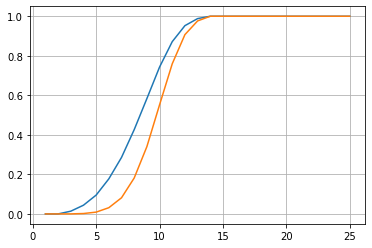

In [36]:
import matplotlib.pyplot as plt

plt.plot(pt_power_curve.wind_speed, pt_power_curve.capacity_factor)
plt.plot(pc.wind_speed, pc.capacity_factor)
plt.grid()
plt.show()

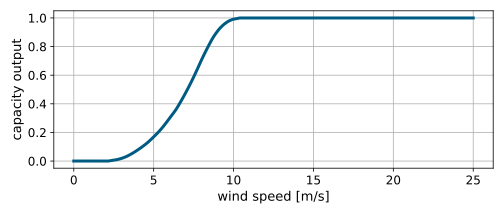

In [64]:
pc